In [9]:
# Setup

import math
import numpy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List
from sklearn.datasets import fetch_openml

import libraries.autodiff as autodiff

In [10]:
# Load MNIST dataset

mnist = fetch_openml(name='mnist_784', version=1)

images, labels = mnist.data, mnist.target

IMAGE_DIM: int = 28
DIGITS = 10

WRONG_ANSWER_VAL = 0
RIGHT_ANSWER_VAL = 1

def get_output_for_digit(digit: int) -> np.ndarray:
    arr = [WRONG_ANSWER_VAL for i in range(0, DIGITS)]
    arr[digit] = RIGHT_ANSWER_VAL
    return np.array(arr)

def get_correct_digit(index: int) -> int:
    return int(labels[index])

def get_output_for_index(index: int) -> np.ndarray:
    return get_output_for_digit(get_correct_digit(index))

TOTAL_TRAINING_CASES = 70000
MAX_VAL = 256

datas = []
for i in range(0, TOTAL_TRAINING_CASES):
    datas.append((np.array([v / MAX_VAL for v in images.iloc[i].values]).reshape((IMAGE_DIM, IMAGE_DIM)), get_output_for_digit(get_correct_digit(i))))

In [17]:
TRAINING_CASES = 50000
VALIDATION_CASES = 10000
TRAINING_ITERATIONS = 10
BATCH_SIZE = 10

training_cases = datas[:TRAINING_CASES]
validation_cases = datas[-VALIDATION_CASES:]

def run_training(network: autodiff.NeuralNetwork, batch_size=BATCH_SIZE, verbose=True):
    correct_portion = []
    for j in range(0, TRAINING_ITERATIONS):
        random.shuffle(training_cases)
        for i in range(0, len(training_cases), batch_size):
            batch_in = [d[0].flatten() for d in training_cases[i:i+batch_size]]
            batch_out = [d[1] for d in training_cases[i:i+batch_size]]
            network.train_batch(batch_in, batch_out)
        if verbose:
            print(np.linalg.norm(network.get_parameters()))

        total_correct = 0
        for i in range(0, len(validation_cases)):
            image = validation_cases[i][0]

            result_raw = network.forwards(image)
            result = np.argmax(result_raw)
            
            if result == np.argmax(validation_cases[i][1]):
                total_correct += 1

        correct_portion.append(total_correct / len(validation_cases))
        if verbose:
            print(str(total_correct / len(validation_cases) * 100) + '% correct')

    return correct_portion

### Linear Model

In [18]:
LOSS_TYPE = autodiff.LossType.L2
OPTIMIZER = autodiff.SimpleOptimizer(0.01)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

l2_gd_correct_portion = run_training(network)

(10, 1) x 1
1.1622942115295785
84.87% correct
1.3592966283733074
85.66% correct
1.4832549769496828
85.63% correct
1.572250988066552
85.97% correct
1.6351969308981305
83.3% correct
1.6810074917896025
85.68% correct
1.7316129184913553
85.06% correct
1.7651384556352023
85.06% correct
1.8057329181243074
84.66% correct
1.8340321191292668
85.63% correct


In [13]:
LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.SimpleOptimizer(0.01)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

ce_gd_correct_portion = run_training(network)

(10, 1) x 1
5.958052902140585
90.03% correct
7.244842166724634
91.03% correct
8.074429445462743
91.33% correct
8.698810821447479
91.58% correct
9.214740576212588
91.79% correct
9.653788447263068
91.89% correct
10.038206770227001
92.15% correct
10.385395240800086
92.21000000000001% correct
10.701800211671914
91.95% correct
10.996757089319834
91.95% correct


In [14]:
LOSS_TYPE = autodiff.LossType.L2
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

l2_adam_correct_portion = run_training(network)

(10, 1) x 1
8.09378902949698
64.1% correct
9.261127910203898
63.89% correct
10.22633940625117
65.86% correct
10.827385460277174
67.28% correct
11.445480525135014
57.35% correct
12.088861841185073
56.56% correct
12.725251039253738
63.849999999999994% correct
13.337847247167627
59.37% correct
13.95118414882715
62.739999999999995% correct
14.40798685422781
53.1% correct


In [15]:
LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

ce_adam_correct_portion = run_training(network)

(10, 1) x 1
57.098673435449975
90.91% correct
83.44782863984355
90.08% correct
105.12663477341738
89.32% correct
124.08222746722356
90.32% correct
141.30456285498676
91.16% correct
157.2087286020278
89.89% correct
172.0986096817088
91.55% correct
186.08264940771085
90.84% correct
199.50680115550313
90.13% correct
212.4946297372233
90.92% correct


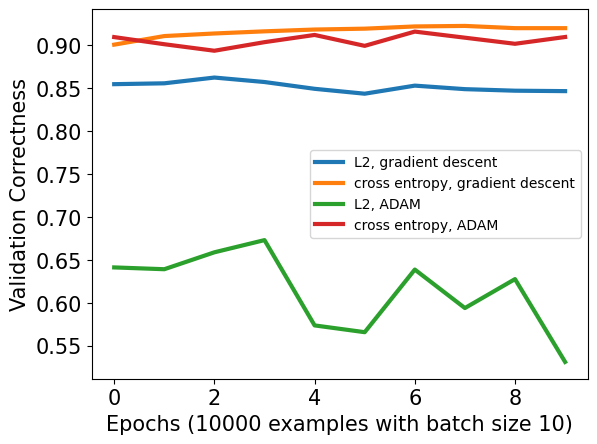

In [16]:
plt.plot(l2_gd_correct_portion, linewidth=3, label="L2, gradient descent")
plt.plot(ce_gd_correct_portion, linewidth=3, label="cross entropy, gradient descent")
plt.plot(l2_adam_correct_portion, linewidth=3, label="L2, ADAM")
plt.plot(ce_adam_correct_portion, linewidth=3, label="cross entropy, ADAM")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Epochs (10000 examples with batch size 10)', fontsize=15)
plt.ylabel('Validation Correctness', fontsize=15)
plt.legend()